># Universidad Autónoma de Aguascalientes
>## *Ingeniería en Computación Inteligente*
>#### Materia:
>Inteligencia Artificial
>#### Topico: 
>Exámen Unidad II
>#### Integrantes del Equipo:
>- Juan Francisco Gallo Ramírez
>- José Alfredo Díaz Robledo
>- Luis Palbo Esparza Terrones
>- Luis Manuel Flores Jiménez 
>#### Maestro: 
>Dr. Francisco Javier Luna Rosas
>#### Fecha: 
>22 de Octubre del 2023

# Exámen Unidad II. *Reconocimiento de Firma*

In [1]:
import string
import random as rnd
import numpy as np
from PIL import Image
import openpyxl
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

### ▪️ Se establecen algunas variables:
Se establecen variables como el ancho y largo de las imagenes, además e la cantidad de elementos estructurantes.

In [2]:
ANCHO, LARGO = 500, 500
CANT_ELEM = 20
A_ELEM, L_ELEM = int(ANCHO/CANT_ELEM), int(LARGO/CANT_ELEM)

### ▪️ Se establece la firma base:
Se abre la imagen de la firma de la cual se estraerán los elementos estructurantes.

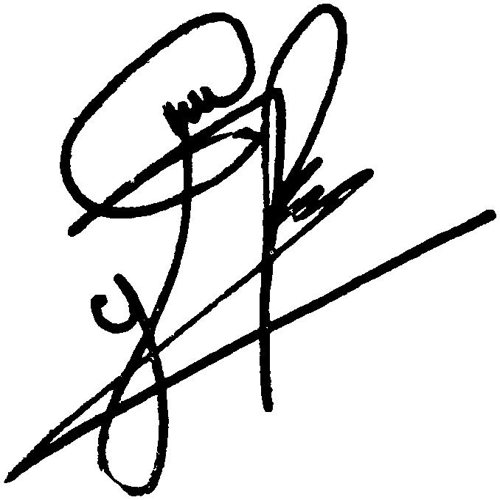

In [3]:
img = Image.open("C:/Users/xxjfg/Desktop/Firmas/FirmaBase.jpg")
img_resized = img.resize((ANCHO, LARGO))
display(img_resized)

### ▪️ Se extraen los elementos estructurantes:
La imagen se divide entre la cantidad correspondiente para generar las "plantillas" que son nuestros elementos estructurantes para detectar patrones.

In [4]:
elemEstImg = []
x1 = int((ANCHO - A_ELEM) / 2)
x2 = x1 + A_ELEM

Se recorta un pedazo e imagen para establecerlo como elemento estructurante y se agrega a nustra lista de elementos estructurantes.

In [5]:
for i in range(0, CANT_ELEM):
    elemEstImg.append(img_resized.crop((x1, i*L_ELEM, x2, (i+1)*L_ELEM)))

Se vizualizan los elementos estructurantes de la firma.

In [6]:
for i in range(0, CANT_ELEM):
    print(" > Elemento estructurante #", i+1)
    display(elemEstImg[i])

 > Elemento estructurante # 1


 > Elemento estructurante # 2


 > Elemento estructurante # 3


 > Elemento estructurante # 4


 > Elemento estructurante # 5


 > Elemento estructurante # 6


 > Elemento estructurante # 7


 > Elemento estructurante # 8


 > Elemento estructurante # 9


 > Elemento estructurante # 10


 > Elemento estructurante # 11


 > Elemento estructurante # 12


 > Elemento estructurante # 13


 > Elemento estructurante # 14


 > Elemento estructurante # 15


 > Elemento estructurante # 16


 > Elemento estructurante # 17


 > Elemento estructurante # 18


 > Elemento estructurante # 19


 > Elemento estructurante # 20


Se convierten los pedazos de imagen en matrices.

In [7]:
elemEst = []
for i in range(0, CANT_ELEM):
    elemEstImg[i] = np.array(elemEstImg[i])
    # Se "binariza" el elemento estructurante.
    elemEst.append((elemEstImg[i] < 128) * 1)
    #print("\n> Elemento estructurante #", i+1, "\n\n", elemEst[i])

### ▪️ Se crea los elementos correpondientes para un  archivo excel:
Se establecen estos elementos para el archivo excel que contendrá nuestro dataset de las firmas.

In [8]:
CANT_FIRMAS = 15
wb = openpyxl.Workbook()
sheet = wb.active
letra = list(string.ascii_uppercase)

Se establecen los títulos del archivo.

In [9]:
for i in range(0, CANT_ELEM):
    sheet[letra[i] + "1"] = "E" + str(i + 1)
sheet[letra[CANT_ELEM] + str(1)] = "Valor"

### ▪️ Se generan los Patrones Reales:
Los patrones reales son los extyraídos de la base de datos de las 15 firmas extraídas de los cheques.

In [10]:
# Variable para almacenar la suma de toda la columna.
sum_colum = [0] * CANT_ELEM
for i in range(2, CANT_FIRMAS + 2):
    imgFir = Image.open("C:/Users/xxjfg/Desktop/Firmas/" + str(i-1) + ".jpg")
    imgFir = imgFir.resize((ANCHO, LARGO))
    for k in range(0, CANT_ELEM):
        # Se reocrta el área correspondiente a evaluar con el elemento estructurante.
        fir = (imgFir.crop((x1, k*L_ELEM, x2, (k+1)*L_ELEM)))
        fir = np.array(fir)
        # Se "binariza" el array.
        fir = (fir < 128) * 1
        # Se hace la intersección con el elemento estructurante.
        r = np.logical_and(fir, elemEst[k])
        # Se hace el conteo de coincidencias.
        r = np.sum(r)
        # Se agrega a la columna correspondiente.
        sheet[letra[k] + str(i)] = r
        sum_colum[k] += r
    # Se añade el valor positivo a la matriz predictoria.
    sheet[letra[CANT_ELEM] + str(i)] = 1

### ▪️ Se generan los Patrones Sintéticos Positivos:
Los patrones sintéticos positivos son los generados a partir de los patrones reales, se aplica una fórmula para que tengan valores aleatorios pero simulando patrones reales.

In [11]:
s = 350
VAL_SIN_P = 50
for i in range(CANT_FIRMAS + 2, CANT_FIRMAS + VAL_SIN_P + 2):
    for k in range(0, CANT_ELEM):
        # Se suma un valor aleatorio al promedio de cada columna para asignar a un nuevo valor de la columna.
        v = int((1/CANT_FIRMAS) * (sum_colum[k] + rnd.randint(-s,s)))
        # Se verifica que solo sean valores mayores o iguales a cero.
        if v < 0:
            sheet[letra[k] + str(i)] = 0
        else:
            sheet[letra[k] + str(i)] = v
    # Se añade el valor positivo a la matriz predictoria.
    sheet[letra[CANT_ELEM] + str(i)] = 1

### ▪️ Se generan los Patrones Sintéticos Negativos:
Los patrones sintéticos negativos son los generados aleatoriamente, estos patrones no tienen ninguna relación con los patrones reales y por ello simularán una firma distinta.

In [12]:
a = 300
VAL_SIN_N = 60
for i in range(CANT_FIRMAS + VAL_SIN_P + 2, CANT_FIRMAS + VAL_SIN_P + VAL_SIN_N + 2):
    for k in range(0, CANT_ELEM):
        # Se suma un valor aleatorio para asignar a un nuevo valor de la columna.
        v = rnd.randint(1,a)
        sheet[letra[k] + str(i)] = v
    # Se añade el valor negativo a la matriz predictoria.
    sheet[letra[CANT_ELEM] + str(i)] = 0

Se guarda el archivo del dataset.

In [13]:
wb.save("DataSetFirmas.xlsx")

# Red neuronal:
A partir de estas líneas se entrena nuestra red.

Se extraen las matrices categoricas y predictorias para ingresarlas a la red.

In [14]:
data = pd.read_excel("DataSetFirmas.xlsx")
X = data.iloc[0:CANT_FIRMAS + VAL_SIN_P + VAL_SIN_N, 0:CANT_ELEM]
y = data.iloc[:,CANT_ELEM]
X = np.array(X)
y = np.array(y)
print( ">> Se muestra la matriz categorica:\n")
print(X)
print( "\n>> Se muestra la matriz a predecir:\n")
print(y)

>> Se muestra la matriz categorica:

[[  0   0   0 ...   0   0   0]
 [ 75 732 675 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [ 29 118 157 ... 238 266 214]
 [ 34 270 154 ... 186  49 226]
 [164 188 137 ...  56  11  79]]

>> Se muestra la matriz a predecir:

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Se separan los datos con el 70% de los datos para entrenamiento y el 30% para testing:

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

Mediante el constructor inicializa la instancia_red.

In [16]:
instancia_red = MLPClassifier(solver='lbfgs', random_state=0)
print(instancia_red)
instancia_red.fit(X_train,y_train)

MLPClassifier(random_state=0, solver='lbfgs')


MLPClassifier(random_state=0, solver='lbfgs')

Las predicciones del testing se muestran:

In [17]:
print(">> Las predicciones en Testing son: {}".format(instancia_red.predict(X_test)))

>> Las predicciones en Testing son: [1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1
 0]


Función para calcular los índices de calidad de la predicción:

In [18]:
def indices_general(MC, nombres = None):
    precision_global = np.sum(MC.diagonal()) / np.sum(MC)
    error_global = 1 - precision_global
    return {">> Matriz de Confusión":MC, 
            ">> Precisión Global":precision_global, 
            ">> Error Global":error_global}

### Índices de Calidad del Modelo:

In [19]:
prediccion = instancia_red.predict(X_test)
MC = confusion_matrix(y_test, prediccion)
indices = indices_general(MC,list(np.unique(y)))
for k in indices:
    print("\n%s:\n%s"%(k,str(indices[k])))


>> Matriz de Confusión:
[[16  0]
 [ 0 22]]

>> Precisión Global:
1.0

>> Error Global:
0.0
